In [3]:
import pandas as pd
import numpy as np

df=pd.read_excel(r'C:\Users\Md Shoaib\c tutorials course\Downloads\Cancer.xlsx')
df.head()

,Age,Gender,Tumor(T),Lymph Node (N),Metastasis (M),Grade (G),Stage,Tumor Size
0,75.65,Female,NaN,NaN,NaN,3,2,22
1,43.19,Female,NaN,NaN,NaN,3,1,10
2,48.87,Female,NaN,NaN,NaN,2,2,15
3,47.68,Female,NaN,NaN,NaN,2,2,25
4,76.97,Female,NaN,NaN,NaN,3,2,40


### Columns

In [6]:
df.columns

Index(['Age ', 'Gender', 'Tumor(T)', 'Lymph Node (N)', ' Metastasis (M)',
       ' Grade (G)', 'Stage', 'Tumor Size'],
      dtype='object')

### Tumor Count and Names

In [9]:
T_count=df['Tumor(T)'].count()
print("Tumor Count:", T_count)

T_name=df['Tumor(T)'].unique()
print("Unique Tumor Names:\n", T_name)

Tumor Count: 3950
Unique Tumor Names:
 [nan 'cT2' 'cT3' 'cT1' 'cT4' 'Unknown' 'TX' 'T2' 'T1c' 'T3' 'T1' 'T4b'
 'T1b' 'T4d' 'T4' 'T2b' 'T1a' 'T3a' 'T2a' 'T1C' 'T4B' 'T1B' 'T4D' 'T1A'
 'T2B' 'T3A' 'T2A']


### Node Count Names

In [12]:
N_count=df['Lymph Node (N)'].count()
print("Node Count:", N_count)

N_name=df['Lymph Node (N)'].unique()
print("Unique Lymph Node (N) Names:\n", N_name)

Node Count: 4199
Unique Lymph Node (N) Names:
 [nan 0 1 '#' 3 'pN1' 'pN0' 'pNx' 'pN2' 'pN3' 'Unknown' 'pN2a' 'pN1a'
 'pN3a' 'pN0b' 'pN1mi' 'pN1biv' 'pN1bi' 'pN1biii' 'NX' 'N1a' 'N0 (i+)'
 'N2a' 'N0' 'N0 (i-)' 'N1' 'N3c' 'N1mi' 'N3a' 'N2' 'N3' 'N1b' 'N1c'
 'N0 (mol+)' 'N3b' 'N1A' 'N0 (I+)' 'N2A' 'N0 (I-)' 'N3C' 'N1MI' 'N3A'
 'N1B' 'N1C' 'N0 (MOL+)' 'N3B']


### Metastatis Count Names

In [15]:
M_count=df[' Metastasis (M)'].count()
print("Metastatis Count:",M_count)

M_name=df[' Metastasis (M)'].unique()
print("Unique Metastatis Names:\n", M_name)

Metastatis Count: 4193
Unique Metastatis Names:
 [nan 0 1 '#' 'M0' 'Mx' 'M1' 'Unknown' 'MX' 'cM0 (i+)' 'CM0 (I+)']


### Stage Count

In [23]:
S_count = (df['Tumor(T)'].notna() & df['Lymph Node (N)'] & df[' Metastasis (M)'].notna()).sum()
print("Total T, N, M values:",S_count)

Total T, N, M values: 3927


## Data Cleaning and Standardization

In [75]:
import pandas as pd
import re
from collections import defaultdict

# Desired output formats
Tumor_Values = ['TX', 'T0', 'T1', 'T1a', 'T1b', 'T1c', 'T2', 'T2a', 'T2b', 'T3', 'T3a', 'T4', 'T4a', 'T4b', 'T4c', 'T4d']
Node_Values = ['NX', 'N0', 'N0b', 'N1', 'N1mi', 'N1a', 'N1b', 'N1c', 'N2', 'N2a', 'N3', 'N3a', 'N3b']
Metastasis_Values = ['MX', 'M0', 'M1']

def standardize_tnm(value, prefix, allowed_values):
    if pd.isna(value) or str(value).strip().lower() in ['unknown', '#']:
        return None
    
    original_value = str(value).strip()
    
    # Handle numeric values (0→N0/M0, 1→N1/M1, etc.)
    if original_value.isdigit():
        if prefix == 'N' and int(original_value) in [0, 1, 2, 3]:
            return f"{prefix}{original_value}"
        elif prefix == 'M' and int(original_value) in [0, 1]:
            return f"{prefix}{original_value}"
    
    # Convert to uppercase for consistent processing
    value = original_value.upper()
    
    # Remove clinical/pathological prefixes (cT1→T1, pN1→N1)
    value = re.sub(r'^[CP]', '', value)
    
    # Handle special cases before removing other characters
    special_cases = {
        'N0(I+)': 'N0b',
        'N0(I-)': 'N0b',
        'N0(MOL+)': 'N0b',
        'N1MI': 'N1mi',
        'N1A': 'N1a',
        'N1B': 'N1b',
        'N1BI': 'N1b',
        'N1BIII': 'N1b',
        'N1BIV': 'N1b',
        'N1C': 'N1c',
        'N2A': 'N2a',
        'N3A': 'N3a',
        'N3B': 'N3b',
        'N3C': 'N3b',
        'M0(I+)': 'M0'
    }
    
    # Check for special cases first
    for case, mapped in special_cases.items():
        if case in value:
            value = mapped
            break
    
    # Remove all non-alphanumeric characters if no special case matched
    if value not in special_cases.values():
        value = re.sub(r'[^A-Z0-9]', '', value)
    
    # Ensure it starts with correct prefix
    if not value.startswith(prefix):
        value = prefix + value.lstrip('TNM')
    
    # Additional specific mappings
    mapping_rules = {
        'T': {
            'T1A': 'T1a',
            'T1B': 'T1b',
            'T1C': 'T1c',
            'T2A': 'T2a',
            'T2B': 'T2b',
            'T3A': 'T3a',
            'T4A': 'T4a',
            'T4B': 'T4b',
            'T4C': 'T4c',
            'T4D': 'T4d'
        },
        'N': {
            'N0B': 'N0b',
            'N1MI': 'N1mi',
            'N1A': 'N1a',
            'N1B': 'N1b',
            'N1C': 'N1c',
            'N2A': 'N2a',
            'N3A': 'N3a',
            'N3B': 'N3b',
            'N3C': 'N3b'
        }
    }
    
    # Apply prefix-specific mappings
    if prefix in mapping_rules:
        for src, target in mapping_rules[prefix].items():
            if src in value:
                value = target
                break
    
    # Convert to correct case (prefix uppercase, rest lowercase)
    if len(value) > 1:
        value = value[0] + value[1:].lower()
    
    # Final validation against allowed values
    for allowed_val in allowed_values:
        if value.upper() == allowed_val.upper():
            return allowed_val
    
    # If we get here, try to salvage the value
    if prefix == 'N':
        # Try to extract just the basic N category
        match = re.match(r'^([N][0-3])', value)
        if match:
            return match.group(1)
    
    return None  # If no valid mapping found

# Apply cleaning
df['Tumor_clean'] = df['Tumor(T)'].apply(lambda x: standardize_tnm(x, 'T', Tumor_Values))
df['Node_clean'] = df['Lymph Node (N)'].apply(lambda x: standardize_tnm(x, 'N', Node_Values))
df['Met_clean'] = df[' Metastasis (M)'].apply(lambda x: standardize_tnm(x, 'M', Metastasis_Values))

# Enhanced count reporting
def print_label_counts(label, series, allowed_values):
    counts = defaultdict(int)
    for val in series:
        counts[val] += 1
    
    print(f"\n{label} Values:")
    for val in allowed_values:
        print(f"{val}: {counts.get(val, 0)}")
    
    # Print unmapped values for debugging
    unmapped = {k: v for k, v in counts.items() if k not in allowed_values and pd.notna(k)}
    if unmapped:
        print("\nUnmapped values:")
        for val, count in unmapped.items():
            print(f"{val}: {count}")

print_label_counts("Tumor", df['Tumor_clean'], Tumor_Values)
print_label_counts("Node", df['Node_clean'], Node_Values)
print_label_counts("Metastasis", df['Met_clean'], Metastasis_Values)


Tumor Values:
TX: 10
T0: 0
T1: 370
T1a: 4
T1b: 43
T1c: 616
T2: 2244
T2a: 2
T2b: 3
T3: 475
T3a: 3
T4: 74
T4a: 0
T4b: 81
T4c: 0
T4d: 8

Node Values:
NX: 55
N0: 2026
N0b: 1
N1: 703
N1mi: 103
N1a: 469
N1b: 104
N1c: 6
N2: 269
N2a: 180
N3: 134
N3a: 134
N3b: 10

Metastasis Values:
MX: 440
M0: 3589
M1: 147


### Cleaned and Standardized Tumor, Node and Metastatis Count

In [77]:
Tumor_clean_count = df['Tumor_clean'].notna().sum()
print("Cleaned Tumor Count:", Tumor_clean_count)

Node_clean_count = df['Node_clean'].notna().sum()
print("Cleaned Node Count:", Node_clean_count)

Met_clean_count = df['Met_clean'].notna().sum()
print("Cleaned Metastatis Count:", Met_clean_count)

S_clean_count = (df['Tumor_clean'].notna() & df['Node_clean'] & df['Met_clean'].notna()).sum()
print("Total Cleaned Stage count:", S_clean_count)

Cleaned Tumor Count: 3933
Cleaned Node Count: 4194
Cleaned Metastatis Count: 4176
Total Cleaned Stage count: 3896


## Stage Calculation

In [106]:
def calculate_stage(t, n, m):

    if pd.isna(t) or pd.isna(n) or pd.isna(m):
        return 'Unknown'
    
    t = str(t).upper()
    n = str(n).upper()
    m = str(m).upper()

    # Handle metastasis
    if m == 'M1':
        return 'Stage IV'

    # Handle unknown TNM
    if t == 'TX' and n == 'NX' and m == 'MX':
        return 'Stage X'

    # Stage 0
    if t == 'TIS' or (t == 'T0' and n in ['N0', 'N0B', 'NX'] and m in ['M0', 'MX']):
        return 'Stage 0'

    # Group T
    t_group = 'T1' if t in ['T1', 'T1A', 'T1B', 'T1C'] else \
              'T2' if t in ['T2', 'T2A', 'T2B'] else \
              'T3' if t in ['T3', 'T3A'] else \
              'T4' if t in ['T4', 'T4A', 'T4B', 'T4C', 'T4D'] else t

    # Group N
    n_group = 'N0' if n in ['N0', 'N0B'] else \
              'N1' if n in ['N1', 'Nimi', 'N1A', 'N1B', 'N1C'] else \
              'N2' if n in ['N2', 'N2A'] else \
              'N3' if n in ['N3', 'N3A', 'N3B'] else n

    # Map substages
    if t_group == 'T1' and n_group == 'N0':
        return 'Stage IA'
        
    elif (t == 'T0' and n == 'N1MI') or (t_group == 'T1' and n == 'N1MI'):
        return 'Stage IB'
        
    elif (t == 'T0' and n_group == 'N1') or (t_group == 'T1' and n_group == 'N1') or (t_group == 'T2' and n_group == 'N0'):
        return 'Stage IIA'
        
    elif (t_group == 'T2' and n_group == 'N1') or (t_group == 'T3' and n_group == 'N0'):
        return 'Stage IIB'
        
    elif (t == 'T0' and n_group == 'N2') or (t_group == 'T1' and n_group == 'N2') or (t_group == 'T2' and n_group == 'N2') or (t_group == 'T3' and n_group == 'N1') or (t_group == 'T3' and n_group == 'N2'):
        return 'Stage IIIA'
        
    elif (t_group == 'T4' and n_group == 'N0') or (t_group == 'T4' and n_group == 'N1') or (t_group == 'T4' and n_group == 'N2'):
        return 'Stage IIIB'

    elif n_group == 'N3':
        return 'Stage IIIC'

    return 'Unknown'


### Example Usage

In [109]:
df['Stage'] = df.apply(lambda row: calculate_stage(row['Tumor_clean'], 
                                                   row['Node_clean'], 
                                                   row['Met_clean']), axis=1)

print("\nStage Distribution:")
print(df['Stage'].value_counts())

print("\nSample Results:")
# Reset index to start from 1
df_display = df[['Tumor_clean', 'Node_clean', 'Met_clean', 'Stage']].reset_index(drop=True)
df_display.index += 1

# Display full DataFrame
print(df_display.to_string())




Stage Distribution:
Stage
Unknown       5265
Stage IIA     1259
Stage IIB      878
Stage IA       639
Stage IIIA     548
Stage IIIC     249
Stage IIIB     100
Stage IV        72
Stage IB        41
Stage X          4
Name: count, dtype: int64

Sample Results:
     Tumor_clean Node_clean Met_clean       Stage
1           None       None      None     Unknown
2           None       None      None     Unknown
3           None       None      None     Unknown
4           None       None      None     Unknown
5           None       None      None     Unknown
6           None       None      None     Unknown
7           None       None      None     Unknown
8           None       None      None     Unknown
9           None       None      None     Unknown
10          None       None      None     Unknown
11          None       None      None     Unknown
12          None       None      None     Unknown
13          None       None      None     Unknown
14          None       None      None   

### Putting all data in my new excel file (Final Cancer Data)

In [122]:
# Prepare the updated DataFrame with cleaned values
df_updated = pd.DataFrame({
    'Age': df['Age '],
    'Gender': df['Gender'],
    'Tumor': df['Tumor_clean'],
    'Node': df['Node_clean'],
    'Metastasis': df['Met_clean'],
    'Grade': df[' Grade (G)'],
    'Stage': df['Stage']
})

# Save it to a new Excel file
df_updated.to_excel(r"C:\Users\Md Shoaib\c tutorials course\Downloads\Final Cancer Data.xlsx", index=False)

print("Cleaned data with Tumor, Node, Metastasis, and Stage saved to 'Final Cancer Data.xlsx'")


Cleaned data with Tumor, Node, Metastasis, and Stage saved to 'Final Cancer Data.xlsx'


### Working on new file

In [139]:
df_new = pd.read_excel(r'C:\Users\Md Shoaib\c tutorials course\Downloads\Final Cancer Data.xlsx')

# Drop rows where Tumor, Node, or Metastasis is null
df_cleaned = df_new.dropna(subset=['Tumor', 'Node', 'Metastasis'])

# Optionally reset the index
df_cleaned.reset_index(drop=True, inplace=True)

# Save the cleaned DataFrame to a new file
df_cleaned.to_excel(r'C:\Users\Md Shoaib\c tutorials course\Downloads\Final Cancer Data_no_nulls.xlsx', index=False)

print("Rows with null Tumor, Node, or Metastasis values dropped and saved.")


Rows with null Tumor, Node, or Metastasis values dropped and saved.


### Standardized Age

In [150]:
# Function to standardize Age
df_age = pd.read_excel(r'C:\Users\Md Shoaib\c tutorials course\Downloads\Final Cancer Data_no_nulls.xlsx')
def standardize_age(value):
    try:
        if isinstance(value, str) and '-' in value:
            parts = value.split('-')
            if len(parts) == 2:
                low = int(parts[0].strip())
                high = int(parts[1].strip())
                return int(round((low + high) / 2))
        else:
            return int(round(float(value)))
    except:
        return np.nan

# Identify the Age column (handles trailing spaces)
age_column = [col for col in df_age.columns if 'age' in col.lower()][0]

# Apply standardization
df_age['Age'] = df_age[age_column].apply(standardize_age)

# Drop the old age column if it had extra spaces and was renamed
if age_column != 'Age':
    df_age.drop(columns=[age_column], inplace=True)

# Save updated DataFrame
df_age.to_excel(r'C:\Users\Md Shoaib\c tutorials course\Downloads\Final Cancer Data_no_nulls.xlsx', index=False)

print("Age column standardized and saved to 'Final Cancer Data_no_nulls.xlsx'.")

Age column standardized and saved to 'Final Cancer Data_no_nulls.xlsx'.


### Showing All Data

In [153]:
df = pd.read_excel(r'C:\Users\Md Shoaib\c tutorials course\Downloads\Final Cancer Data_no_nulls.xlsx')

In [186]:
from tabulate import tabulate

# i) Total number of rows
total_rows = len(df)

# ii) Total number of columns
total_columns = len(df.columns)

# iii) Column names
columns = list(df.columns)

# iv) Age group count
bins = [19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
age_group_count = df['Age_Group'].value_counts().sort_index()

# v) Different types of Tumor count
gender_count = df['Gender'].value_counts()

# vi) Different types of Tumor count
tumor_count = df['Tumor'].value_counts()

# vii) Different types of Node count
node_count = df['Node'].value_counts()

# viii) Different types of Metastasis count
met_count = df['Metastasis'].value_counts()

# ix) Different types of Stage count
stage_count = df['Stage'].value_counts()

# Printing all
print(tabulate([["Total Rows", total_rows], ["Total Columns", total_columns]], headers=["Metric", "Value"], tablefmt="grid"))

print("\nColumn Names:")
print(tabulate([[col] for col in columns], headers=["Columns"], tablefmt="grid"))

print("\nAge Group Count:")
print(tabulate(age_group_count.reset_index().values, headers=["Age Group", "Count"], tablefmt="grid"))

print("\nGender Count:")
print(tabulate(gender_count.reset_index().values, headers=["Gender", "Count"], tablefmt="grid"))

print("\nTumor Types Count:")
print(tabulate(tumor_count.reset_index().values, headers=["Tumor", "Count"], tablefmt="grid"))

print("\nNode Types Count:")
print(tabulate(node_count.reset_index().values, headers=["Node", "Count"], tablefmt="grid"))

print("\nMetastasis Types Count:")
print(tabulate(met_count.reset_index().values, headers=["Metastasis", "Count"], tablefmt="grid"))

print("\nStage Count:")
print(tabulate(stage_count.reset_index().values, headers=["Stage", "Count"], tablefmt="grid"))

+---------------+---------+
| Metric        |   Value |
+===============+=========+
| Total Rows    |    3896 |
+---------------+---------+
| Total Columns |       8 |
+---------------+---------+

Column Names:
+------------+
| Columns    |
+============+
| Age        |
+------------+
| Gender     |
+------------+
| Tumor      |
+------------+
| Node       |
+------------+
| Metastasis |
+------------+
| Grade      |
+------------+
| Stage      |
+------------+
| Age_Group  |
+------------+

Age Group Count:
+-------------+---------+
| Age Group   |   Count |
+=============+=========+
| 20-29       |      35 |
+-------------+---------+
| 30-39       |     247 |
+-------------+---------+
| 40-49       |     793 |
+-------------+---------+
| 50-59       |    1006 |
+-------------+---------+
| 60-69       |    1003 |
+-------------+---------+
| 70-79       |     538 |
+-------------+---------+
| 80-89       |     237 |
+-------------+---------+
| 90-99       |      21 |
+-------------+---

## Data Visualization

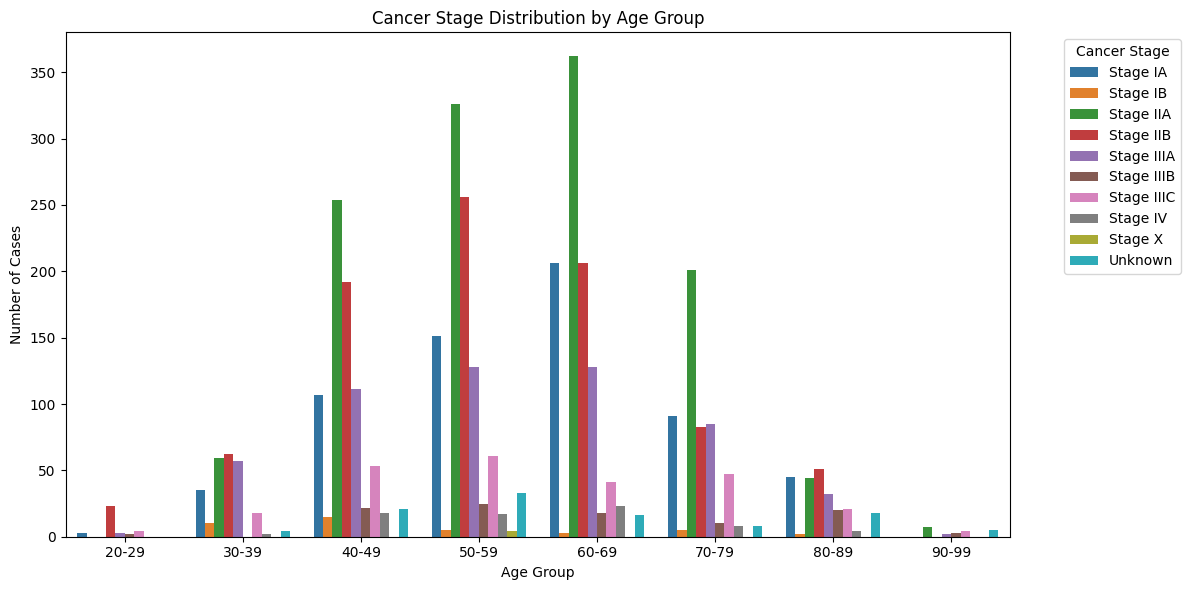

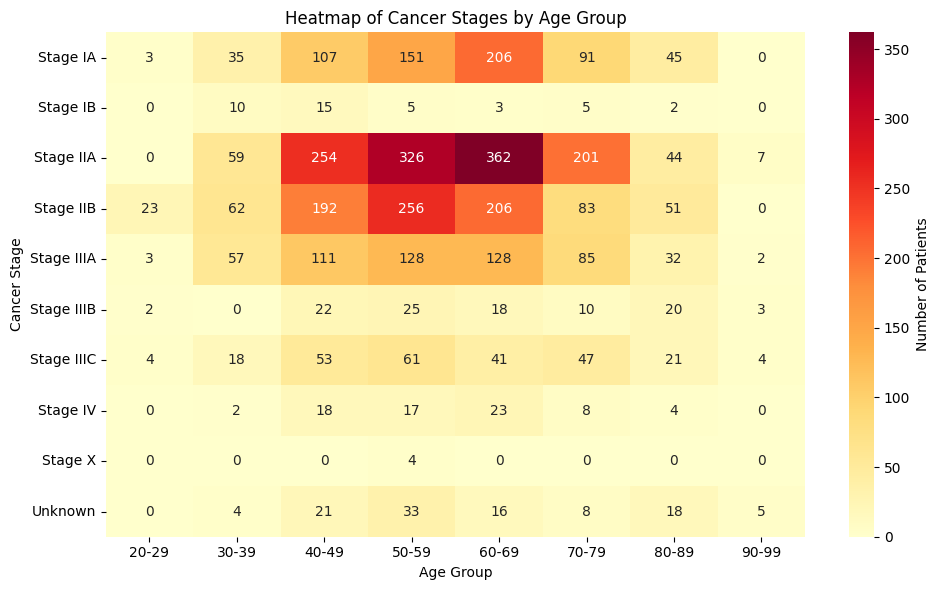

In [184]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)
#Define age bins and labels
bins = [19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

#Create Age Group column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

#Count number of cases per stage and age group
stage_counts = df.groupby(['Age_Group', 'Stage']).size().reset_index(name='Count')

#Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=stage_counts, x='Age_Group', y='Count', hue='Stage')
plt.title('Cancer Stage Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.legend(title='Cancer Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('bar.png')
plt.show()


print()
print()
print()
print()
print()

#Create pivot table for heatmap
heatmap_data = df.pivot_table(index='Stage', columns='Age_Group', aggfunc='size', fill_value=0)

#Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Number of Patients'})
plt.title('Heatmap of Cancer Stages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Cancer Stage')
plt.tight_layout()
plt.savefig('heat.png')
plt.show()